Author : Jason Lee

# US House of Representatives Congressmen House 

I will be working with a dataset obtained from the [CI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records).

The goal will be to predict their party affiliation ('Democrat' or 'Republican') based on how they voted on certain key issues. Here, it's worth noting that we have preprocessed this dataset to deal with missing values. This is so that your focus can be directed towards understanding how to train and evaluate supervised learning models. 

In [1]:
from sklearn import datasets

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("house-votes-84.csv")

## Eploratory Data Analysis

In [3]:
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [4]:
list(df.columns.values) 

['party',
 'infants',
 'water',
 'budget',
 'physician',
 'salvador',
 'religious',
 'satellite',
 'aid',
 'missile',
 'immigration',
 'synfuels',
 'education',
 'superfund',
 'crime',
 'duty_free_exports',
 'eaa_rsa']

In [5]:
df.shape

(435, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
party                435 non-null object
infants              435 non-null object
water                435 non-null object
budget               435 non-null object
physician            435 non-null object
salvador             435 non-null object
religious            435 non-null object
satellite            435 non-null object
aid                  435 non-null object
missile              435 non-null object
immigration          435 non-null object
synfuels             435 non-null object
education            435 non-null object
superfund            435 non-null object
crime                435 non-null object
duty_free_exports    435 non-null object
eaa_rsa              435 non-null object
dtypes: object(17)
memory usage: 57.9+ KB


In [8]:
df.isnull().any()

party                False
infants              False
water                False
budget               False
physician            False
salvador             False
religious            False
satellite            False
aid                  False
missile              False
immigration          False
synfuels             False
education            False
superfund            False
crime                False
duty_free_exports    False
eaa_rsa              False
dtype: bool

- Except for 'party', all of the columns are of type float.
- There are 17 predictor variables, or features, in this DataFrame.
- The DataFrame has a total of 435 rows and 17 columns.
- There are missing values

### Clean dataset

In [8]:
df = df.replace("n",0).replace('y',1).replace("?", np.nan).dropna()

In [9]:
df

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,republican,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,republican,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y


## Visual EDA

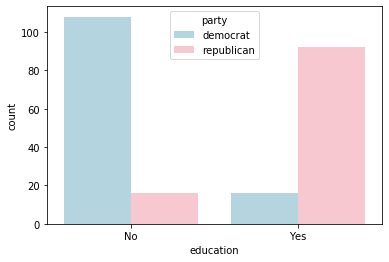

In [10]:
plt.figure()
sns.countplot(x='education', hue='party', data=df, palette=["lightblue", "pink"])
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

It seems like Democrats voted resoundingly against this bill.

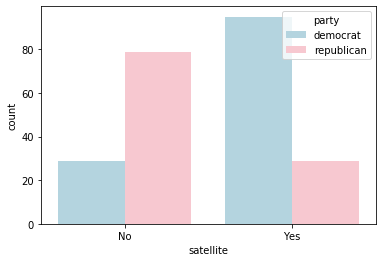

In [11]:
plt.figure()
sns.countplot(x='satellite', hue='party', data=df, palette=["lightblue", "pink"])
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

It seems like Democrats voted resoundingly for this bill.

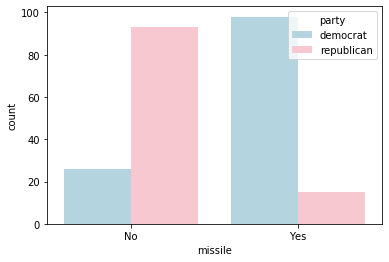

In [12]:
plt.figure()
sns.countplot(x='missile', hue='party', data=df, palette=["lightblue", "pink"])
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

It seems like Democrats voted resoundingly for this bill.

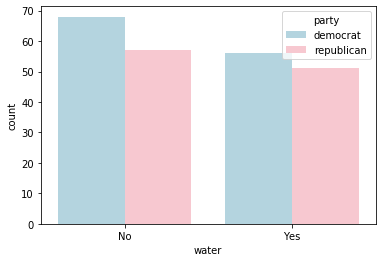

In [ ]:
plt.figure()
sns.countplot(x='water', hue='party', data=df, palette=["lightblue", "pink"])
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

It seems like it was fairly even between parties for water.

In [ ]:
plt.figure()
sns.countplot(x='immigration', hue='party', data=df, palette=["lightblue", "pink"])
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

Similarly very close on both sides for immigration.

## k-Nearest Neighbors: Fit
Having explored the Congressional voting records dataset, it is time now to build your first classifier. 

The features need to be in an array where each column is a feature and each row a different observation or data point - in this case, a Congressman's voting record. The target needs to be a single column with the same number of observations as the feature data. 

I will create an instance of a k-NN classifier with 6 neighbors (by specifying the n_neighbors parameter) and then fit it to the data.

In [44]:
from sklearn.neighbors import KNeighborsClassifier

Create arrays X and y for the features and the target variable. Note the use of .drop() to drop the target variable 'party' from the feature array X as well as the use of the .values attribute to ensure X and y are NumPy arrays. Without using .values, X and y are a DataFrame and Series respectively; the scikit-learn API will accept them in this form also as long as they are of the right shape.

In [45]:
# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

Now that your k-NN classifier with 6 neighbors has been fit to the data, it can be used to predict the labels of new data points.

## k-Nearest Neighbors: Predict

Having fit a k-NN classifier, you can now use it to predict the label of a new data point. However, there is no unlabeled data available since all of it was used to fit the model. You can still use the .predict() method on the X that was used to fit the model, but it is not a good indicator of the model's ability to generalize to new, unseen data.

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 21, stratify=y)

#set classifier
knn = KNeighborsClassifier(n_neighbors = 8)

#train on training data
knn.fit(X_train, y_train)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9142857142857143


In [55]:
#Check score of the preidicitons
knn.score(X_test, y_test)

0.9142857142857143

We can see that the model performed relatively well at a score of 91%

## Model Accuracy

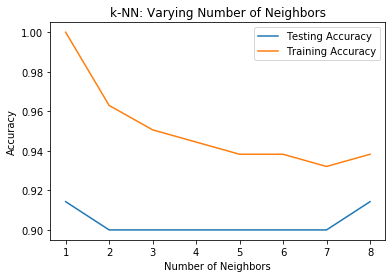

In [57]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors= k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()